In [136]:
from src.data_preprocessor import DataProcessor
from data_configs.configs import *
from models.decision_tree import DecisionTree, DecisionTreeNode
from models.null_model import NullModelClassification
from src.cross_validation import CrossValidation
from src.evaluation import Evaluation
import numpy as np

config = machine_config
data_processor = DataProcessor(config=config)
cross_validator = CrossValidation(config=config)

In [137]:
raw_data = data_processor.load_data()

data_1 = data_processor.impute_missing_values(raw_data)

data_2 = data_1.drop(columns=['vendor_name','model_name','ERP'])

data_3 = data_processor.standardize_data(data_2,data_2,features=['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX'])

In [138]:
data_3

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,-0.302859,-0.673409,-0.494275,5.680569,1.658008,4.220899,198
1,-0.671717,1.323114,1.722913,0.167228,0.484346,0.528211,269
2,-0.671717,1.323114,1.722913,0.167228,0.484346,0.528211,220
3,-0.671717,1.323114,1.722913,0.167228,0.484346,0.528211,172
4,-0.671717,1.323114,0.358489,0.167228,0.484346,-0.087238,132
...,...,...,...,...,...,...,...
204,-0.306701,-0.481594,-0.323723,-0.620392,-0.542608,-0.394962,42
205,-0.406600,-0.481594,-0.323723,0.167228,-0.395900,-0.394962,46
206,-0.302859,-0.223779,-0.323723,-0.620392,-0.395900,-0.164169,52
207,1.061146,-0.607408,-0.323723,0.167228,-0.689316,-0.702686,67


In [139]:
data_train, data_val = cross_validator.random_partition(data_3, random_state=42)

In [140]:
data = data_train.to_numpy()
X = data[:,:-1]
y = data[:,-1:]

In [141]:
# Add weights
bias = np.ones((X.shape[0],1))
X = np.hstack([bias,X])
W = np.random.rand(X.shape[1],1)/100

In [142]:
X@W

array([[ 6.63740340e-03],
       [ 2.00574871e-02],
       [ 6.84906519e-02],
       [-2.84509697e-03],
       [ 3.71137109e-02],
       [-5.31249650e-03],
       [-7.87366343e-03],
       [-6.32815339e-03],
       [-4.20799078e-03],
       [-7.19712268e-03],
       [-5.75536984e-03],
       [-5.60030348e-03],
       [ 2.12143717e-02],
       [ 2.18768578e-03],
       [-7.42470129e-03],
       [-7.66154934e-03],
       [ 1.27852108e-02],
       [ 1.77843701e-02],
       [ 3.83184953e-03],
       [-5.30989473e-03],
       [ 1.13848601e-02],
       [-2.33318125e-03],
       [ 1.60999783e-03],
       [-5.97507543e-03],
       [-4.95784387e-03],
       [ 9.21727343e-03],
       [-1.50074723e-03],
       [ 1.05503514e-02],
       [-5.70268660e-03],
       [-2.59547231e-03],
       [-1.56412999e-03],
       [ 4.24086892e-03],
       [-1.61173538e-03],
       [-4.29204712e-03],
       [-5.49526094e-03],
       [-6.83786227e-03],
       [-1.74172165e-03],
       [-2.83085250e-03],
       [-9.0

In [143]:
lr = 0.01
epochs = 1000
losses = []

for epoch in range(epochs):
    Scores = X @ W  # Predicted values
    residuals = y - Scores  # Residual errors
    loss = np.mean(residuals ** 2)  # Mean squared error loss
    gradient = -2 * X.T @ residuals / X.shape[0]  # Gradient of the loss w.r.t. W
    W = W - lr * gradient  # Update weights
    print(loss)
    losses.append(loss)

29111.321128983487
27229.759763687245
25519.647265619788
23963.445781586648
22545.498269321353
21251.82320481724
20069.931840817342
18988.665533589156
17998.05092869727
17089.171039917863
16254.050472039175
15485.553231018766
14777.291736453537
14123.545803903085
13519.190500375134
12959.631897086483
12440.749851104085
11958.847043115706
11510.603583684187
11093.036576065035
10703.464091048387
10339.473069242222
9998.890719563226
9679.759030172689
9380.312050335393
9098.955639265883
8834.249411472045
8584.89063786678
8349.699888400812
8127.608225534821
7917.645778838472
7718.931549663721
7530.664311444374
7352.114485950039
7182.616888971421
7021.564250615112
6868.401425798897
6722.620219805027
6583.75476199554
6451.377368132567
6325.094838277758
6204.545143057696
6089.394456255177
5979.334496290414
5874.080143253894
5773.36730179983
5676.950983455314
5584.603584789669
5496.113340460415
5411.282932441627
5329.928238778301
5251.877207024594
5176.96883913878
5105.052276045581
5035.9859713

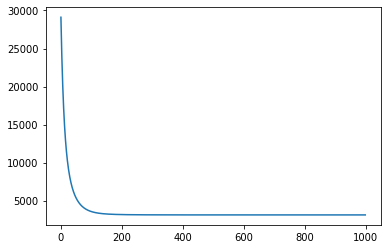

In [144]:
import matplotlib.pyplot as plt

plt.plot(losses)

In [145]:
data_test = data_val.to_numpy()
X_test = data_test[:,:-1]
y_test = data_test[:,-1:]

bias = np.ones((X_test.shape[0],1))
X_test = np.hstack([bias,X_test])

In [146]:
X_test.shape

(42, 7)

In [147]:
y_test.shape

(42, 1)

In [148]:
W.shape

(7, 1)

In [149]:
Scores_new = X_test@W
MSE = np.mean((Scores_new-y_test)**2)

In [150]:
MSE

5628.719149391975